# FINAL MERGING

**Alleno un nuovo algoritmo a partire dai dati ottenuti dagli altri due notebook PROVASBRDDTS e PROVATFIDF**

## Carico Dati e Librerie

In [10]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [11]:
train_data_TFIDF = pd.read_csv('/home/gdeandrea/Scrivania/UNI/Data Mining/ESAME2020/TFIDF_train_output.csv', encoding="utf8")
train_data_SBRDDTS = pd.read_csv('/home/gdeandrea/Scrivania/UNI/Data Mining/ESAME2020/SBRDDTS_train_output.csv', encoding="utf8")

In [12]:
train_data_TFIDF.head()

,author,TFIDF
0,Shamus_Aran,0.001001
1,Riddance,0.953315
2,Secret_Wizard,0.005145
3,Penultimatum,0.001635
4,7-SE7EN-7,0.032177


In [52]:
Xtfidf = train_data_TFIDF.TFIDF

In [53]:
train_data_SBRDDTS.head()

,author,TFIDF
0,Shamus_Aran,0.058609
1,Riddance,0.943190
2,Secret_Wizard,0.027803
3,Penultimatum,0.189337
4,7-SE7EN-7,0.015078


In [64]:
Xsbrddts = train_data_SBRDDTS.SBRDDTS

**Unisco i dati da sbrddts e tfidf**

In [65]:
type(Xsbrddts)

pandas.core.series.Series

In [67]:
XSBRDDTS = reshape(Xsbrddts.values,(5000,1))

In [68]:
XSBRDDTS.shape

(5000, 1)

In [69]:
type(Xtfidf)

pandas.core.series.Series

In [70]:
XTFIDF = reshape(Xtfidf.values,(5000,1))

In [71]:
XTFIDF.shape

(5000, 1)

In [72]:
X = hstack([XSBRDDTS,XTFIDF])

In [73]:
X.shape

(5000, 2)

**Carico etichette target**

In [16]:
target = pd.read_csv('/home/gdeandrea/Scrivania/UNI/Data Mining/ESAME2020/Kaggle data/train_target.csv')

In [17]:
target.head()

,author,gender
0,RedThunder90,0
1,Lirkmor,1
2,In0chi,0
3,ProjectGrudge,0
4,TehTurtleHermit,0


In [18]:
y = target.gender

## Model Selection 

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 32)

In [76]:
#importo i modelli
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from collections import OrderedDict

# creo dizionario dei modelli di classificazione
# Multinomial Naive Bayes non funziona perchè dopo la PCA i dati possono assumere valori negativi (in X hanno valore 0 o 1 a seconda che l'autore abbia o no partecipato al subreddit)
#PERCHé assumono vaori anche negativi? perchè sono nuove features combo lineari degli 0 e 1?
models = OrderedDict([
          ('Knn 5', KNeighborsClassifier(4)),
          ('Gaussian Naive Bayes', GaussianNB()),
          ('Multinomial Naive Bayes', MultinomialNB()),
          ('Logistic Regression', LogisticRegression(solver='liblinear')), #uso liblinear, mlto efficiente su large and sparse datasets
          #('Linear SVM', SVC(kernel='linear', probability=True)),
          #('Poly SVM', SVC(kernel='poly', degree=2, probability=True)),
          #('RBF SVM', SVC(kernel='rbf', gamma=2, C=1, probability=True)),
          ('Classification Tree', DecisionTreeClassifier(max_depth=5)),
          ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=100)),
          ('Multilayer Perceptron', MLPClassifier((4,3,2), activation='tanh',solver='adam', early_stopping=True, max_iter=5000,
                                                  learning_rate='invscaling', random_state=0))
          ])

In [77]:
best_score=.0
best_name=' '

for name in models:
    clf = models[name]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score>best_score:
        best_score=score
        best_name=name
    print(name, score)
    
print('\nBest model is ', best_name, 'with a score = ', best_score)

Knn 5 0.984
Gaussian Naive Bayes 0.982
Multinomial Naive Bayes 0.737
Logistic Regression 0.987
Classification Tree 0.984
Random Forest 0.987
Multilayer Perceptron 0.985

Best model is  Logistic Regression with a score =  0.987


## Logistic Regression - FINAL

**Optimization**

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]

Best C: 10.0

Best score: 0.989 



Text(0, 0.5, 'Score (accuracy)')

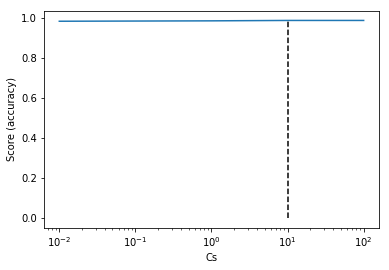

In [79]:
creg=logspace(-2,2,5)
print(creg)
scores=[]
bestcreg = 0

for c in creg:
    logreg=LogisticRegression(solver='liblinear', C=c)
    logreg.fit(X_train, y_train)
    scores.append(logreg.score(X_test, y_test))
    
bestcreg = creg[np.argmax(scores)]
    
print ('\nBest C:', creg[np.argmax(scores)])
print ('\nBest score:', scores[np.argmax(scores)],'\n')

semilogx(creg, scores)
plt.vlines(creg[np.argmax(scores)], 0, scores[np.argmax(scores)], linestyles='dashed')
plt.xlabel('Cs')
plt.ylabel('Score (accuracy)')

**Alleno su tutto train set**

In [80]:
LRFINALE = LogisticRegression(solver='liblinear', C = bestcreg).fit(X,y)

# Carico Dati Test set di TFIDF e SBRDDTS

In [81]:
test_data_TFIDF = pd.read_csv('/home/gdeandrea/Scrivania/UNI/Data Mining/ESAME2020/solutionTFIDF.csv', encoding="utf8")
test_data_SBRDDTS = pd.read_csv('/home/gdeandrea/Scrivania/UNI/Data Mining/ESAME2020/solutionSBRDDTS.csv', encoding="utf8")

In [82]:
test_data_TFIDF.head()

,author,gender
0,ejchristian86,0.999932
1,ZenDragon,0.002011
2,savoytruffle,0.001946
3,hentercenter,0.206546
4,rick-o-suave,0.029035


In [84]:
XTESTtfidf = test_data_TFIDF.gender
XTESTsbrddts = test_data_SBRDDTS.gender

In [86]:
XTESTSBRDDTS = reshape(XTESTsbrddts.values,(15000,1))
XTESTTFIDF = reshape(XTESTtfidf.values,(15000,1))

In [87]:
XTESTTFIDF.shape

(15000, 1)

In [90]:
XTEST = hstack([XTESTSBRDDTS, XTESTTFIDF])
XTEST.shape

(15000, 2)

In [91]:
predictions_output = LRFINALE.predict_proba(XTEST)[:,1]
predictions_output.shape

(15000,)

In [95]:
finalsolution = pd.DataFrame({"author":test_data_TFIDF.author, "gender":predictions_output})
finalsolution.to_csv("finalsolution.csv", index=False)

In [97]:
%%sh
head finalsolution.csv

author,gender
ejchristian86,0.9991720953439611
ZenDragon,0.0027603537834908964
savoytruffle,0.002785327489376799
hentercenter,0.015673278693440526
rick-o-suave,0.008125869770049086
olivermihoff,0.6724312501173917
Cleriesse,0.9986177550993389
murderer_of_death,0.002730503898045412
SpiralSoul,0.005197214056171368
